In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

In [2]:
df=pd.read_csv("Data/survey_results_public.csv")
df.head(10)


,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,...,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,...,Strongly disagree,Male,High school,White or of European descent,Strongly disagree,Strongly agree,Disagree,Strongly agree,NaN,NaN
1,2,Student,"Yes, both",United Kingdom,"Yes, full-time",Employed part-time,Some college/university study without earning ...,Computer science or software engineering,"More than half, but not all, the time",20 to 99 employees,...,Strongly disagree,Male,A master's degree,White or of European descent,Somewhat agree,Somewhat agree,Disagree,Strongly agree,NaN,37500.0
2,3,Professional developer,"Yes, both",United Kingdom,No,Employed full-time,Bachelor's degree,Computer science or software engineering,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A professional degree,White or of European descent,Somewhat agree,Agree,Disagree,Agree,113750.0,NaN
3,4,Professional non-developer who sometimes write...,"Yes, both",United States,No,Employed full-time,Doctoral degree,A non-computer-focused engineering discipline,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A doctoral degree,White or of European descent,Agree,Agree,Somewhat agree,Strongly agree,NaN,NaN
4,5,Professional developer,"Yes, I program as a hobby",Switzerland,No,Employed full-time,Master's degree,Computer science or software engineering,Never,10 to 19 employees,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,6,Student,"Yes, both",New Zealand,"Yes, full-time","Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,...,Disagree,NaN,A bachelor's degree,White or of European descent,Disagree,Agree,Disagree,Agree,NaN,NaN
6,7,Professional non-developer who sometimes write...,"Yes, both",United States,No,Employed full-time,Master's degree,A non-computer-focused engineering discipline,"Less than half the time, but at least one day ...",20 to 99 employees,...,Disagree,Male,A doctoral degree,White or of European descent,Disagree,Agree,Disagree,Agree,NaN,NaN
7,8,Professional developer,"Yes, both",Poland,No,Employed full-time,Master's degree,Computer science or software engineering,All or almost all the time (I'm full-time remote),Fewer than 10 employees,...,Somewhat agree,Male,A master's degree,White or of European descent,Agree,Somewhat agree,Disagree,Agree,NaN,NaN
8,9,Professional developer,"Yes, I program as a hobby",Colombia,"Yes, part-time",Employed full-time,Bachelor's degree,Computer science or software engineering,"Less than half the time, but at least one day ...","5,000 to 9,999 employees",...,Strongly disagree,Male,A bachelor's degree,Hispanic or Latino/Latina,Somewhat agree,Strongly agree,Disagree,Strongly agree,NaN,NaN
9,10,Professional developer,"Yes, I program as a hobby",France,"Yes, full-time","Independent contractor, freelancer, or self-em...",Master's degree,Computer science or software engineering,It's complicated,NaN,...,Disagree,Male,A doctoral degree,White or of European descent,Somewhat agree,Agree,Disagree,Agree,NaN,NaN


In [3]:
df_info=pd.read_csv("Data/survey_results_schema.csv")
df_info.head(20)

,Column,Question
0,Respondent,Respondent ID number
1,Professional,Which of the following best describes you?
2,ProgramHobby,Do you program as a hobby or contribute to ope...
3,Country,In which country do you currently live?
4,University,"Are you currently enrolled in a formal, degree..."
5,EmploymentStatus,Which of the following best describes your cur...
6,FormalEducation,Which of the following best describes the high...
7,MajorUndergrad,Which of the following best describes your mai...
8,HomeRemote,How often do you work from home or remotely?
9,CompanySize,"In terms of the number of employees, how large..."


In [4]:
df.describe()

,Respondent,CareerSatisfaction,JobSatisfaction,HoursPerWeek,StackOverflowSatisfaction,Salary,ExpectedSalary
count,51392.000000,42695.000000,40376.000000,20600.000000,36592.000000,12891.000000,2566.000000
mean,25696.500000,7.300574,6.957078,3.952282,8.429875,56298.480641,33142.220468
std,14835.736854,1.955444,2.167652,7.564722,1.390635,39880.905277,30162.988829
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,12848.750000,6.000000,6.000000,1.000000,8.000000,26440.371839,4490.492484
50%,25696.500000,8.000000,7.000000,1.000000,9.000000,50000.000000,29364.263691
75%,38544.250000,9.000000,8.000000,4.000000,10.000000,80000.000000,50403.225806
max,51392.000000,10.000000,10.000000,40.000000,10.000000,197000.000000,187500.000000


In [5]:
df_info.describe()

,Column,Question
count,154,154
unique,154,149
top,HighestEducationParents,Which of the following database technologies h...
freq,1,2


In [13]:
#View for null values 
df.isnull().sum()

Respondent                  0
Professional                0
ProgramHobby                0
Country                     0
University                  0
                        ...  
QuestionsInteresting    16856
QuestionsConfusing      16973
InterestedAnswers       16780
Salary                  38501
ExpectedSalary          48826
Length: 154, dtype: int64

In [6]:
df_info.isnull().info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 154 entries, 0 to 153
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Column    154 non-null    bool 
 1   Question  154 non-null    bool 
dtypes: bool(2)
memory usage: 436.0 bytes


In [57]:
#See the columns of df 
df.columns


Index(['Respondent', 'Professional', 'ProgramHobby', 'Country', 'University',
       'EmploymentStatus', 'FormalEducation', 'MajorUndergrad', 'HomeRemote',
       'CompanySize',
       ...
       'StackOverflowMakeMoney', 'Gender', 'HighestEducationParents', 'Race',
       'SurveyLong', 'QuestionsInteresting', 'QuestionsConfusing',
       'InterestedAnswers', 'Salary', 'ExpectedSalary'],
      dtype='object', length=154)

In [16]:
#View of data types, catogirical or numerical 
df.dtypes

Respondent                int64
Professional             object
ProgramHobby             object
Country                  object
University               object
                         ...   
QuestionsInteresting     object
QuestionsConfusing       object
InterestedAnswers        object
Salary                  float64
ExpectedSalary          float64
Length: 154, dtype: object

In [8]:
#Number of respondents for survey 2017
df['Respondent'].nunique()


51392

In [9]:
#If we want to look for columns which columns has no missing values
no_nulls=set(df.columns[df.isnull().mean()==0])
print(no_nulls)

{'EmploymentStatus', 'FormalEducation', 'ProgramHobby', 'Professional', 'University', 'Respondent', 'Country'}


In [10]:
#And for schema data frame
no_nulls_schema=set(df_info.columns[df_info.isnull().mean()==0])
print(no_nulls_schema)

{'Question', 'Column'}


In [12]:
#Find which columns have missing values with mroe than 50 percent
cols_withNulls=set(df.columns[df.isnull().mean()>0.5])
print(cols_withNulls)

{'WebDeveloperType', 'AssessJobProfDevel', 'AssessJobDiversity', 'AssessJobProjects', 'AssessJobCommute', 'ExCoderActive', 'AssessJobExp', 'InfluenceCloud', 'HaveWorkedFramework', 'CousinEducation', 'ExCoderBalance', 'AssessJobProduct', 'Currency', 'YearsCodedJobPast', 'MobileDeveloperType', 'AssessJobOffice', 'WantWorkDatabase', 'InfluenceVizTools', 'AssessJobRole', 'AssessJobFinances', 'JobProfile', 'ExpectedSalary', 'AssessJobTech', 'AssessJobIndustry', 'InfluenceDatabase', 'Salary', 'AssessJobDept', 'Overpaid', 'InfluenceDeptTech', 'MetricAssess', 'NonDeveloperType', 'AssessJobCompensation', 'InfluenceWorkstation', 'InfluenceHardware', 'ExCoder10Years', 'InfluenceRecruitment', 'EducationImportant', 'AssessJobRemote', 'InfluenceTechStack', 'InfluenceConsultants', 'ExCoderBelonged', 'InfluenceCommunication', 'ExCoderWillNotCode', 'InfluenceServers', 'LearnedHiring', 'TimeAfterBootcamp', 'ExCoderReturn', 'WantWorkFramework', 'ExCoderNotForMe', 'HoursPerWeek', 'AssessJobLeaders', 'ExCo

In [13]:
df_info.head

<bound method NDFrame.head of                    Column                                           Question
0              Respondent                               Respondent ID number
1            Professional         Which of the following best describes you?
2            ProgramHobby  Do you program as a hobby or contribute to ope...
3                 Country            In which country do you currently live?
4              University  Are you currently enrolled in a formal, degree...
..                    ...                                                ...
149  QuestionsInteresting                     The questions were interesting
150    QuestionsConfusing                       The questions were confusing
151     InterestedAnswers  I'm interested in learning how other developer...
152                Salary  What is your current annual base salary, befor...
153        ExpectedSalary  You said before that you are currently learnin...

[154 rows x 2 columns]>

In [14]:
#In order to understand the data better, writing a function that get the describtion of each column from schema data set
def get_description(column_name, schema):
    '''
    Input: column name,string, name of column we will get the description of
           schema: pandas dataframe of the survey
    Output: description of the column
    '''
    desc=list(schema[schema['Column']==column_name]['Question'])[0]
    return desc

In [18]:
get_description('MajorUndergrad',df_info)


"Which of the following best describes your main field of study (aka 'major') in college or university/for your undergraduate studies?"

In [19]:
#'Question 1:Is there an equality  of salary and working hours across males and females?
#Finding related statistics
splitted_gender=df.groupby(df.Gender)
df_male=splitted_gender.get_group('Male')
df_female=splitted_gender.get_group("Female")
print('The total number of respondents is',df.shape[0],'and there was',df.Gender.isnull().sum(),
      'have null values','Males were',df_male.shape[0],'and females were',df_female.shape[0],'and the rest are others')


The total number of respondents is 51392 and there was 16345 have null values Males were 31589 and females were 2600 and the rest are others


In [20]:
print(sum(df['Gender'].value_counts(normalize=False)))

35047


In [21]:
df_female.describe()


,Respondent,CareerSatisfaction,JobSatisfaction,HoursPerWeek,StackOverflowSatisfaction,Salary,ExpectedSalary
count,2600.000000,2237.000000,2130.000000,1183.000000,2562.000000,819.000000,159.000000
mean,26901.968462,7.185069,6.936620,4.191885,8.332943,58083.924534,29830.759637
std,14535.145431,1.924722,2.182432,7.343370,1.425352,38607.488222,29389.372370
min,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.044046
25%,14857.750000,6.000000,6.000000,1.000000,8.000000,31250.000000,1956.196728
50%,26245.500000,7.000000,7.000000,2.000000,8.000000,52500.000000,22500.000000
75%,40975.000000,8.000000,8.000000,4.000000,9.000000,83000.000000,45845.552297
max,51386.000000,10.000000,10.000000,40.000000,10.000000,195000.000000,150000.000000


In [124]:
#If we compare between males and females we can see that the average salary for males is almost 57 K$/year and for females is 58K$ per 
#year which are almost equal. From hours/week side 

In [22]:
#Question2  Which programming language has the highest job satisfaction
df.HaveWorkedLanguage.value_counts()


C#; JavaScript; SQL                                                                                           1276
JavaScript; PHP; SQL                                                                                          1143
Java                                                                                                           913
JavaScript                                                                                                     807
JavaScript; PHP                                                                                                662
                                                                                                              ... 
Java; JavaScript; Objective-C; PHP; SQL; Swift; TypeScript                                                       1
C; C++; Java; Python; Smalltalk                                                                                  1
C#; JavaScript; Lua; Python; TypeScript                                         

In [23]:
missing_languages=sum(df.HaveWorkedLanguage.isnull())
print('There is',missing_languages,'missing languages and',np.sum(df.HaveWorkedLanguage.count()),'with values')


There is 14767 missing languages and 36625 with values


In [42]:
#split the languages in HaveWorkedLanguage column
#We split them in order to make dealing with them easier
splited_lang=df.HaveWorkedLanguage.str.split(';')
#Filling the missing values
splited_lang=splited_lang.fillna('N')
#Combining them all together to count each one alone
#Initilize list for combining
#splited_lang
lang_list=[]
for val in splited_lang:
    for n in val:
        lang_list.append(n)
lang_list

['Swift',
 'JavaScript',
 ' Python',
 ' Ruby',
 ' SQL',
 'Java',
 ' PHP',
 ' Python',
 'Matlab',
 ' Python',
 ' R',
 ' SQL',
 'N',
 'JavaScript',
 ' PHP',
 ' Rust',
 'Matlab',
 ' Python',
 'CoffeeScript',
 ' Clojure',
 ' Elixir',
 ' Erlang',
 ' Haskell',
 ' JavaScript',
 ' Python',
 ' Ruby',
 'C#',
 ' JavaScript',
 'Objective-C',
 ' Swift',
 'R',
 ' SQL',
 'N',
 'C',
 ' C++',
 ' Java',
 'Java',
 ' JavaScript',
 ' Ruby',
 ' SQL',
 'Assembly',
 ' C',
 ' C++',
 'JavaScript',
 ' VB.NET',
 'JavaScript',
 'C',
 ' Clojure',
 ' JavaScript',
 ' Matlab',
 ' Rust',
 ' SQL',
 ' Swift',
 'N',
 'Perl',
 ' Python',
 'N',
 'C#',
 ' JavaScript',
 ' SQL',
 'Java',
 'PHP',
 ' SQL',
 'N',
 'Java',
 ' Scala',
 'Java',
 ' JavaScript',
 ' Objective-C',
 ' Python',
 ' Swift',
 'N',
 'JavaScript',
 ' Python',
 'N',
 'N',
 'N',
 'C#',
 ' Java',
 'JavaScript',
 'Assembly',
 ' C',
 'C#',
 ' JavaScript',
 ' Matlab',
 ' Python',
 ' R',
 'C#',
 ' F#',
 ' JavaScript',
 ' SQL',
 'C#',
 ' Java',
 ' JavaScript',
 'C#',


In [43]:
# After we converted them in an array, we will calculate their occurrences

def group_list(data_list):
    ''' Group by count to a list,
        returns a result dict.
    '''
    
    grouped_list = dict(Counter(data_list))
    grouped_dict = [{'Programming Language':key, 'Count': value} for key, value in grouped_list.items()]
    
    return grouped_dict



In [44]:
lang_list=group_list(lang_list)
lang_list

[{'Programming Language': 'Swift', 'Count': 72},
 {'Programming Language': 'JavaScript', 'Count': 5716},
 {'Programming Language': ' Python', 'Count': 10719},
 {'Programming Language': ' Ruby', 'Count': 3174},
 {'Programming Language': ' SQL', 'Count': 18466},
 {'Programming Language': 'Java', 'Count': 5902},
 {'Programming Language': ' PHP', 'Count': 9765},
 {'Programming Language': 'Matlab', 'Count': 133},
 {'Programming Language': ' R', 'Count': 1482},
 {'Programming Language': 'N', 'Count': 14767},
 {'Programming Language': ' Rust', 'Count': 412},
 {'Programming Language': 'CoffeeScript', 'Count': 698},
 {'Programming Language': ' Clojure', 'Count': 214},
 {'Programming Language': ' Elixir', 'Count': 223},
 {'Programming Language': ' Erlang', 'Count': 232},
 {'Programming Language': ' Haskell', 'Count': 536},
 {'Programming Language': ' JavaScript', 'Count': 17159},
 {'Programming Language': 'C#', 'Count': 8596},
 {'Programming Language': 'Objective-C', 'Count': 305},
 {'Programmin

In [56]:
#There are 14767 missing values
#Building dataframe for the dictionary to easly analyz it
df_lang = pd.DataFrame.from_dict(lang_list)
#Drop the missing values with No language field
df_lang=df_lang.drop(labels=9, axis=0)
#sorting them
df_lang=df_lang.sort_values(['Count'], ascending= False)
df_lang

,Programming Language,Count
4,SQL,18466
16,JavaScript,17159
2,Python,10719
6,PHP,9765
23,Java,8622
...,...,...
67,F#,24
65,Hack,22
69,TypeScript,9
68,Visual Basic 6,8


<AxesSubplot:xlabel='Programming Language'>

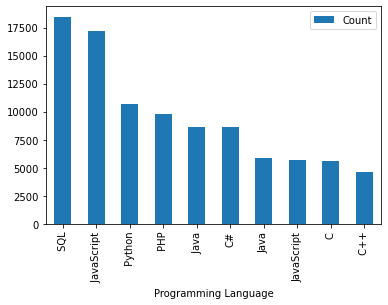

In [57]:
#The highest programming languages are SQL,Javascript,Python and the lowest are Rust,Visual Basic and TypeScrpit
top10_lang=df_lang.head(10)
top10_lang.plot.bar(x='Programming Language', y='Count', style='o')



In [58]:
#Finding the lowest ten and plotting them
Lowest10_kang=df_lang.nsmallest(10,'Count')
Lowest10_kang


,Programming Language,Count
57,Rust,4
68,Visual Basic 6,8
69,TypeScript,9
65,Hack,22
67,F#,24
61,Julia,28
64,VBA,28
47,VB.NET,33
62,Dart,37
60,Lua,38


<AxesSubplot:xlabel='Programming Language'>

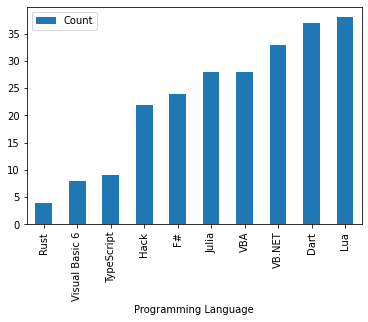

In [59]:
Lowest10_kang.plot.bar(x='Programming Language', y='Count', style='o')
#Here we analyzed the languages and found the top languages and lowest also.

In [98]:
#Question3:  Which countries embrace work from home most?
#Analyzing the data, drop the null values
df_home = df.dropna(axis=0, subset=['Country', "HomeRemote"])
df_home.head()

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,...,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
1,2,Student,"Yes, both",United Kingdom,"Yes, full-time",Employed part-time,Some college/university study without earning ...,Computer science or software engineering,"More than half, but not all, the time",20 to 99 employees,...,Strongly disagree,Male,A master's degree,White or of European descent,Somewhat agree,Somewhat agree,Disagree,Strongly agree,NaN,37500.0
2,3,Professional developer,"Yes, both",United Kingdom,No,Employed full-time,Bachelor's degree,Computer science or software engineering,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A professional degree,White or of European descent,Somewhat agree,Agree,Disagree,Agree,113750.0,NaN
3,4,Professional non-developer who sometimes write...,"Yes, both",United States,No,Employed full-time,Doctoral degree,A non-computer-focused engineering discipline,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A doctoral degree,White or of European descent,Agree,Agree,Somewhat agree,Strongly agree,NaN,NaN
4,5,Professional developer,"Yes, I program as a hobby",Switzerland,No,Employed full-time,Master's degree,Computer science or software engineering,Never,10 to 19 employees,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,7,Professional non-developer who sometimes write...,"Yes, both",United States,No,Employed full-time,Master's degree,A non-computer-focused engineering discipline,"Less than half the time, but at least one day ...",20 to 99 employees,...,Disagree,Male,A doctoral degree,White or of European descent,Disagree,Agree,Disagree,Agree,NaN,NaN


In [115]:
#Finding the unique values of HomeRemote
df_home.HomeRemote.unique()

array(['More than half, but not all, the time',
       'Less than half the time, but at least one day each week', 'Never',
       "All or almost all the time (I'm full-time remote)",
       'A few days each month', 'About half the time'], dtype=object)

In [116]:
#We need another column to indicate whether the respondent work from home
df_home['WorkFromHome'] =  df_home['HomeRemote'].isin (['About half the time', 
                                                     "All or almost all the time (I'm full-time remote)",
                                                     "More than half, but not all, the time",
                                                     "Less than half the time, but at least one day each week"])

In [117]:
country_wfh = df_home.groupby(['Country'])['WorkFromHome'].mean().sort_values(ascending = False)


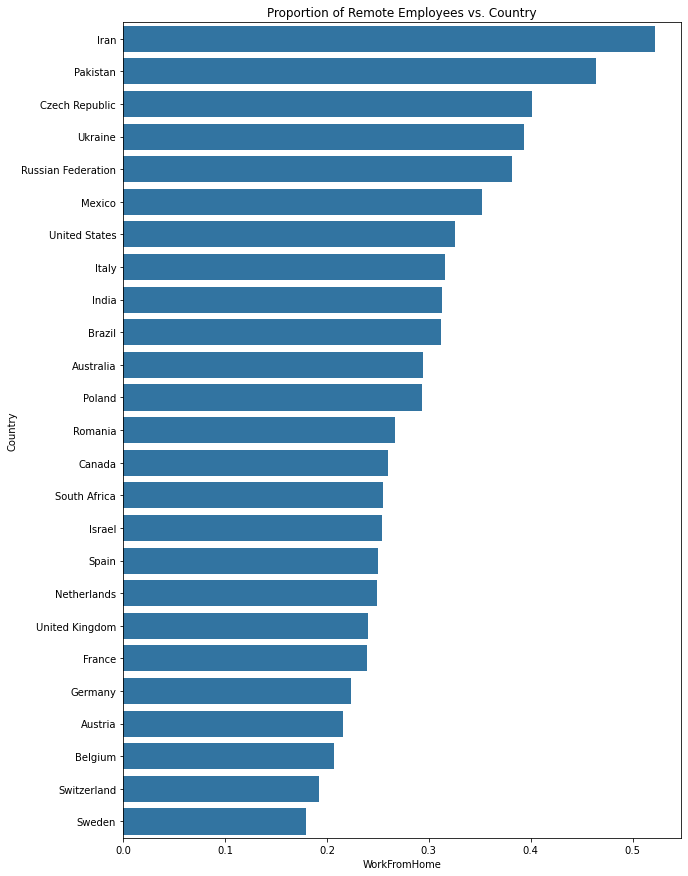

In [119]:
#plot the results
plt.figure(figsize=[10,15])
sns.barplot(y=country_wfh.index, x=country_wfh, color=sns.color_palette()[0])
plt.title("Proportion of Remote Employees vs. Country");


In [ ]:
#Work from home is more popular for developers in these countries: Iran, Pakistan.
